## DATASET

### Download do Dataset

O conjunto de dados **Cats vs Dogs** está disponível publicamente no Google Cloud Storage.

No **Google Colab**, o download costuma ser feito com o comando de shell:

```bash
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
```

Como este notebook será executado no **Windows + VS Code**, adotamos uma solução **100% Python** (`urllib.request`) para garantir portabilidade e evitar dependências de utilitários externos (`wget`/`curl`).


In [17]:
import urllib.request

url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
urllib.request.urlretrieve(url, "cats_and_dogs_filtered.zip")


('cats_and_dogs_filtered.zip', <http.client.HTTPMessage at 0x12ae120fa80>)

### Extração do Dataset

No **Google Colab**, a extração do arquivo compactado é feita com o comando de shell:

```bash
!unzip cats_and_dogs_filtered.zip
```

Como o `unzip` não está disponível por padrão no **Windows + VS Code**, utilizamos o módulo `zipfile` da biblioteca padrão do Python.  
Essa abordagem é **portável** e funciona em qualquer sistema operacional.


In [18]:
import zipfile

with zipfile.ZipFile("cats_and_dogs_filtered.zip", "r") as zip_ref:
    zip_ref.extractall(".")


### Remoção do Arquivo Compactado

Após a extração, o arquivo `.zip` não é mais necessário.  
No **Google Colab**, o comando usado é:

```bash
!rm -rf cats_and_dogs_filtered.zip
```

Como o comando `rm` não está disponível no **Windows + VS Code**, utilizamos a função `os.remove()` da biblioteca padrão do Python.  
Essa solução é mais **portável** e evita dependência de comandos de terminal.


In [19]:
import os

if os.path.exists("cats_and_dogs_filtered.zip"):
    os.remove("cats_and_dogs_filtered.zip")


### Instalação de Dependências

No **Google Colab**, a instalação de bibliotecas adicionais é feita diretamente na célula de código, por exemplo:

```bash
!pip install tensorflow
```

No **Jupyter local (VS Code)**, a prática recomendada é:

- Usar `%pip install` dentro do notebook, o que garante que a instalação será feita no **mesmo kernel Python** em execução.
- Ou, preferencialmente, instalar todas as dependências de uma vez via terminal Bash, com:

```bash
pip install -r requirements.txt
```

👉 Isso assegura que os pacotes serão instalados dentro do **ambiente virtual** configurado para o projeto, e não no Python global do sistema.


In [20]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [21]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [22]:
dataset_dir = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')

dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_train_cats_len = len(os.listdir(os.path.join(dataset_train_dir, 'cats')))
dataset_train_dogs_len = len(os.listdir(os.path.join(dataset_train_dir, 'dogs')))

dataset_validation_dir = os.path.join(dataset_dir, 'validation')
dataset_validation_cats_len = len(os.listdir(os.path.join(dataset_validation_dir, 'cats')))
dataset_validation_dogs_len = len(os.listdir(os.path.join(dataset_validation_dir, 'dogs')))

print('Train Cats: %s' % dataset_train_cats_len)
print('Train Dogs: %s' % dataset_train_dogs_len)
print('Validation Cats: %s' % dataset_validation_cats_len)
print('Validation Dogs: %s' % dataset_validation_dogs_len)

Train Cats: 1000
Train Dogs: 1000
Validation Cats: 500
Validation Dogs: 500


In [23]:
image_width = 160
image_height = 160
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel,)

batch_size = 32
epochs = 20
learning_rate = 0.0001

class_names = ['cat', 'dog']

In [24]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 2000 files belonging to 2 classes.


In [25]:
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir,
    image_size = (image_width, image_height),
    batch_size = batch_size,
    shuffle = True
)

Found 1000 files belonging to 2 classes.


In [26]:
dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)
dataset_validation_batches = dataset_validation_cardinality // 5

dataset_test = dataset_validation.take(dataset_validation_batches)
dataset_validation = dataset_validation.skip(dataset_validation_batches)

print('Validation Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_validation))
print('Test Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_test))

Validation Dataset Cardinality: 26
Test Dataset Cardinality: 6


In [27]:
autotune = tf.data.AUTOTUNE

dataset_train = dataset_train.prefetch(buffer_size = autotune)
dataset_validation = dataset_validation.prefetch(buffer_size = autotune)
dataset_test = dataset_validation.prefetch(buffer_size = autotune)

In [28]:
def plot_dataset(dataset):

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, labels in dataset.take(1):

        for i in range(9):

            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])

<Figure size 640x480 with 0 Axes>

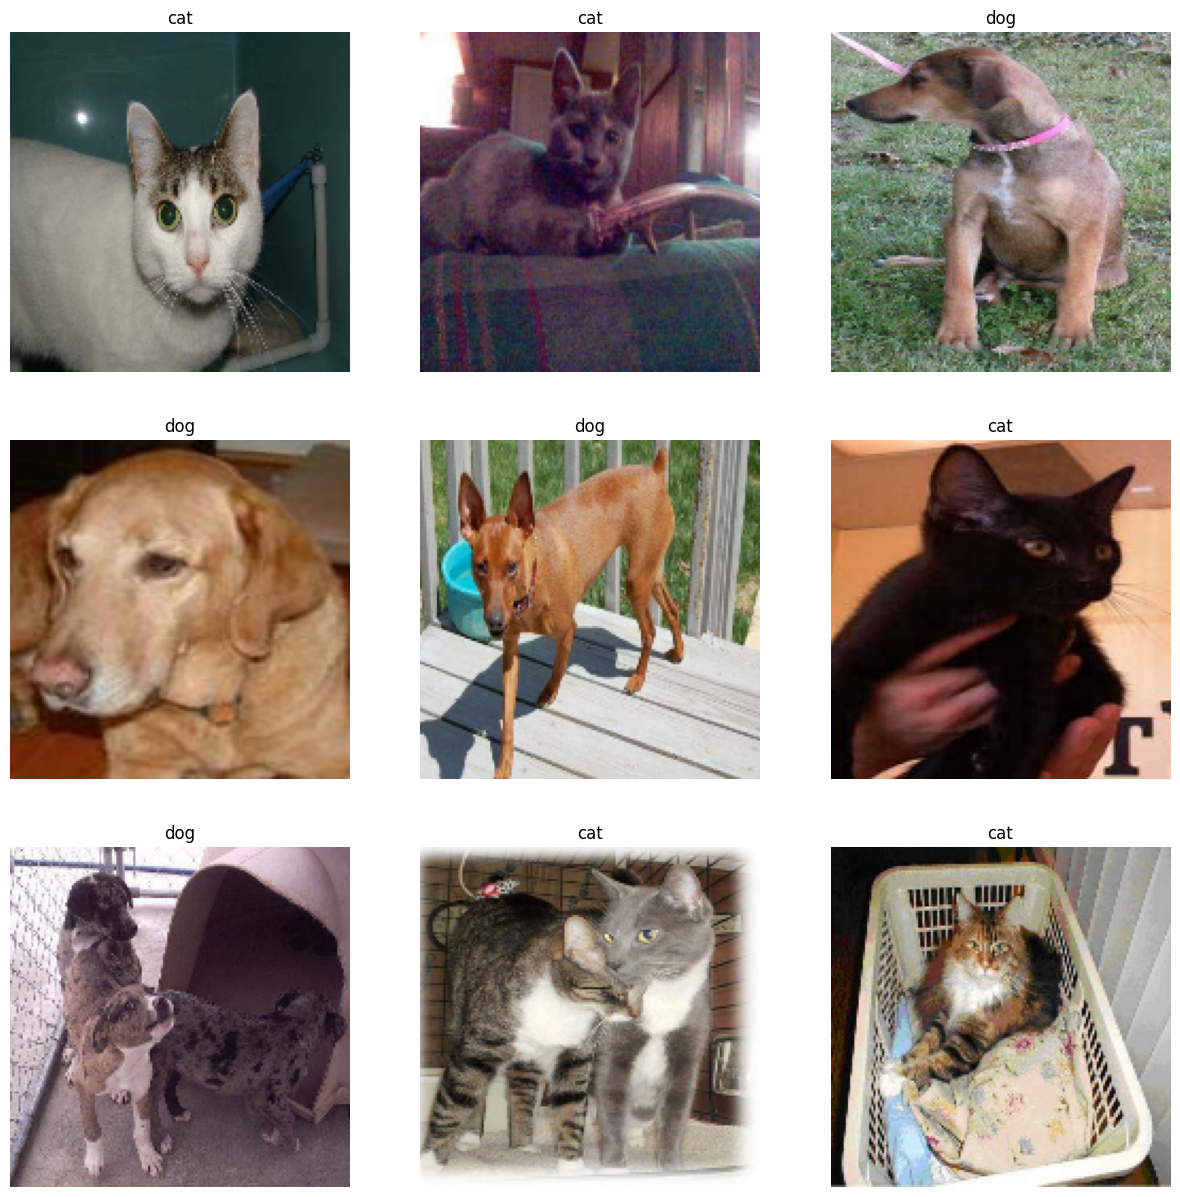

In [29]:
plot_dataset(dataset_train)

<Figure size 640x480 with 0 Axes>

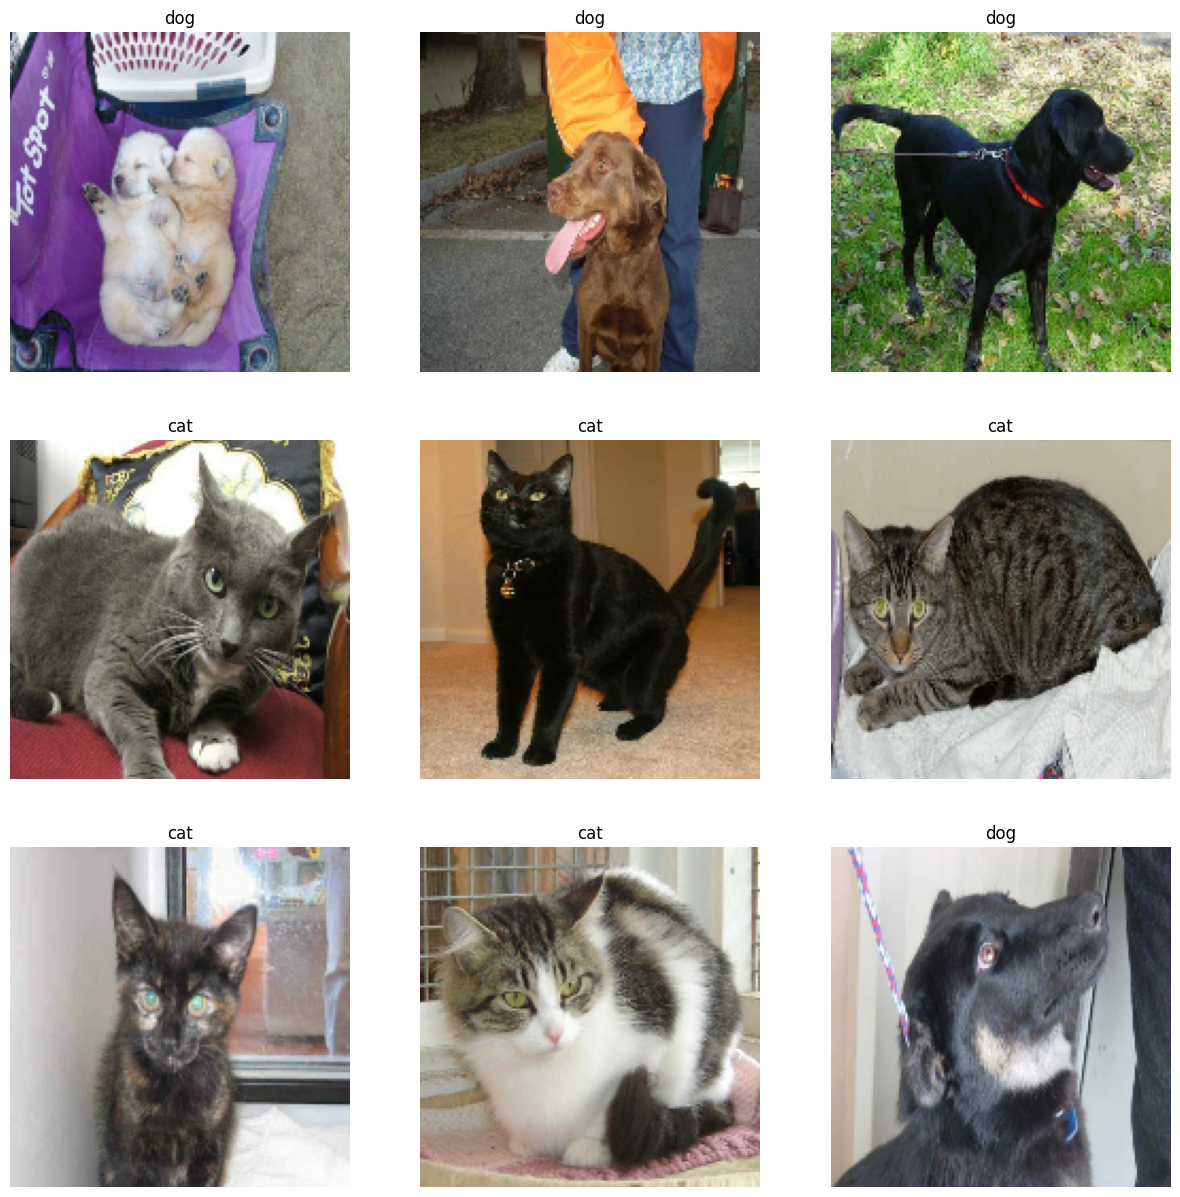

In [30]:
plot_dataset(dataset_validation)

<Figure size 640x480 with 0 Axes>

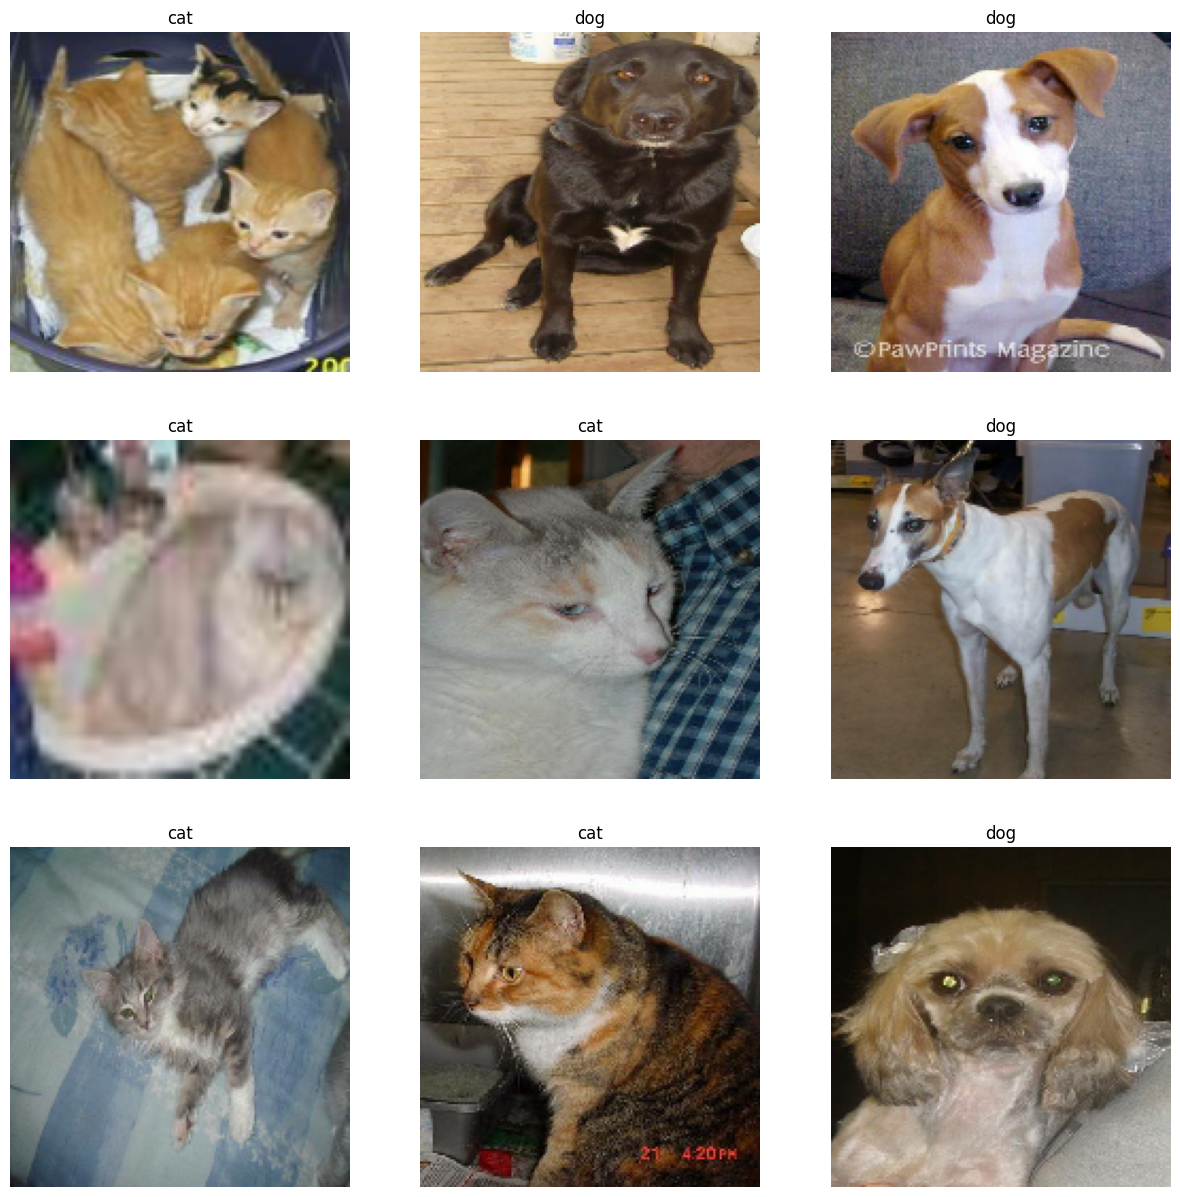

In [31]:
plot_dataset(dataset_test)

### DATA AUGMENTATION

In [32]:
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'

In [ ]:
def plot_dataset_data_augmentation(dataset):

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, _ in dataset.take(1):

        feature = features[0]

        for i in range(9):

            feature_data_augmentation = data_augmentation(tf.expand_dims(feature, 0))

            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(feature_data_augmentation[0] / image_color_channel_size)

In [ ]:
plot_dataset_data_augmentation(dataset_train)

### LAYER RESCALING

In [ ]:
rescaling = tf.keras.layers.experimental.preprocessing.Rescaling(1. / (image_color_channel_size / 2.), offset = -1, input_shape = image_shape)

### TRANSFER LEARNING

In [ ]:
model_transfer_learning = tf.keras.applications.MobileNetV2(input_shape = image_shape, include_top = False, weights = 'imagenet')
model_transfer_learning.trainable = False

model_transfer_learning.summary()

### EARLY STOPPING

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

### MODEL

In [ ]:
model = tf.keras.models.Sequential([
    rescaling,
    data_augmentation,
    model_transfer_learning,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

In [ ]:
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = epochs,
    callbacks = [
        early_stopping
    ]
)

In [ ]:
def plot_model():

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.gcf().clear()
    plt.figure(figsize = (15, 8))

    plt.subplot(1, 2, 1)
    plt.title('Training and Validation Accuracy')
    plt.plot(epochs_range, accuracy, label = 'Training Accuracy')
    plt.plot(epochs_range, val_accuracy, label = 'Validation Accuracy')
    plt.legend(loc = 'lower right')

    plt.subplot(1, 2, 2)
    plt.title('Training and Validation Loss')
    plt.plot(epochs_range, loss, label = 'Training Loss')
    plt.plot(epochs_range, val_loss, label = 'Validation Loss')
    plt.legend(loc = 'lower right')

    plt.show()

In [ ]:
plot_model()

### MODEL EVALUATION

In [ ]:
dataset_test_loss, dataset_test_accuracy = model.evaluate(dataset_test)

print('Dataset Test Loss:     %s' % dataset_test_loss)
print('Dataset Test Accuracy: %s' % dataset_test_accuracy)

In [ ]:
def plot_dataset_predictions(dataset):

    features, labels = dataset_test.as_numpy_iterator().next()

    predictions = model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < 0.5, 0, 1)

    print('Labels:      %s' % labels)
    print('Predictions: %s' % predictions.numpy())

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for i in range(9):

        plt.subplot(3, 3, i + 1)
        plt.axis('off')

        plt.imshow(features[i].astype('uint8'))
        plt.title(class_names[predictions[i]])

In [ ]:
plot_dataset_predictions(dataset_test)

### SAVE & LOAD

In [ ]:
model.save('model')

In [ ]:
model = tf.keras.models.load_model('model')

### PREDICTIONS

In [ ]:
def predict(image_file):

    image = tf.keras.preprocessing.image.load_img(image_file, target_size = image_size)
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = tf.expand_dims(image, 0)

    prediction = model.predict(image)[0][0]

    print('Prediction: {0} | {1}'.format(prediction, ('cat' if prediction < 0.5 else 'dog')))

In [ ]:
def predict_url(image_fname, image_origin):

    image_file = tf.keras.utils.get_file(image_fname, origin = image_origin)
    return predict(image_file)

In [ ]:
predict('chico.png')

In [ ]:
predict_url('dog', 'https://www.sciencemag.org/sites/default/files/styles/article_main_large/public/main_puppies_1280p.jpg')